In [101]:
# Load libraries
import seaborn
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score


In [87]:
dataset = pandas.read_csv("Iris.csv")

In [88]:
print(dataset.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [89]:
print(dataset.shape)

(150, 6)


In [90]:
dataset = dataset.drop('Id',axis=1)

In [91]:


print(dataset.describe())


       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000


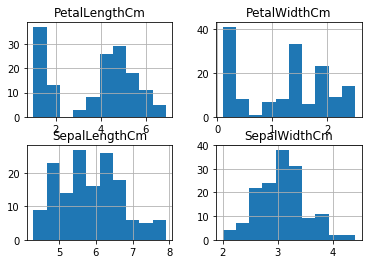

In [92]:
dataset.hist()
plt.show()

In [93]:
from sklearn.model_selection import train_test_split
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, 
random_state=seed)

In [94]:
# Test options and evaluation metric
num_folds = 10
num_instances = len(X_train)
seed = 7
scoring = 'accuracy'
models = []

models.append(('DT', DecisionTreeClassifier()))

# evaluate each model in turn
results = []
names = []

In [95]:
import sklearn
for name, model in models:
	kfold = sklearn.model_selection.KFold(n_splits=10,shuffle=False, random_state=None)
	cv_results = sklearn.model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

DT: 0.975000 (0.038188)


In [96]:
clf = DecisionTreeClassifier()
clf.fit(X_train, Y_train)
predictions = clf.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9


In [97]:
print(confusion_matrix(Y_validation, predictions))

[[ 7  0  0]
 [ 0 10  2]
 [ 0  1 10]]


In [98]:
print(classification_report(Y_validation, predictions))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.91      0.83      0.87        12
 Iris-virginica       0.83      0.91      0.87        11

      micro avg       0.90      0.90      0.90        30
      macro avg       0.91      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



In [104]:
#Precision
precision = precision_score((Y_validation), predictions, average='micro')
print("Precision", str(precision))

#recall
recall = recall_score((Y_validation), predictions, average='micro')
print("Recall : ", str(recall))

#f-score
f_score = f1_score((Y_validation), predictions, average='micro')
print("F Score : " + str(f_score))


Precision 0.9
Recall :  0.9
F Score : 0.9
